<h1 style="font-size: 3rem; color: red">Selection sort vs Quick sort</h1>

# Introduzione
In questo notebook confrontiamo le prestazioni di due tra i principali algoritmi di ordinamento, utilizzati per ordinare un insieme di elementi (un array o una lista):
- **Selection Sort**: algoritmo semplice, ma inefficiente per un gran numero di elementi
- **Quick Sort**: algoritmo divide-et-impera, molto più efficiente

Confronteremo i due algoritmi su array generati casualmente a ogni esecuzione, misurando:
- Il **tempo di esecuzione**
- L'**efficienza al crescere della dimensione dell'input**

<h2 style="font-size: 2rem; color: blue">Selection sort</h2>

## Descrizione

Il _selection sort_ è un algoritmo di ordinamento che mette in ordine crescente o decrescente un elenco di elementi. È un algoritmo semplice e intuitivo che si usa quando si hanno **pochi elementi** da ordinare. Ad ogni iterazione cerca il **minimo** nella parte non ordinata della lista e lo scambia con quello in prima posizione della parte non ordinata.

- **Tempo medio**: O(n²)  
- **Caso peggiore**: O(n²)  
- Molto efficiente su piccole quantità di dati

Possiamo notare dal costo di esecuzione nel caso peggiore e medio che all'aumentare del numero di elementi le prestazioni di questo algoritmo calano **drasticamente**.

## Codice dell'algoritmo

In [56]:
def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

## Esempio di funzionamento

In [59]:
array = [20,15,64,75,33,95,13,8]
print("array ordinato: ", selection_sort(array))

array ordinato:  [8, 13, 15, 20, 33, 64, 75, 95]


<h2 style="font-size: 2rem; color: blue">Quicksort</h2>

## Descrizione

Il _Quick Sort_ è un algoritmo di ordinamento veloce che usa il metodo *divide-et-impera*.
Sceglie un **pivot**, divide l'array in due parti (elementi minori e maggiori del pivot), ordina ricorsivamente le due parti e le combina.

- **Tempo medio**: O(n log n)  
- **Caso peggiore**: O(n²)  
- Molto efficiente su grandi quantità di dati

La _complessità computazionale_ dell'algoritmo di _quicksort_ dipende dalla __scelta del _pivot___ e dal modo in cui viene effettuato il _partition_. 

Infatti se il pivot viene scelto in **modo casuale** o se viene scelto un **pivot mediano** (ovvero l'elemento di mezzo del mio insieme di elementi), allora il *costo computazionale* dell'algoritmo sarà generalmente **_O(n log n)_** . Questo perché, in questi casi, ad ogni passo il numero di elementi viene diviso approssimativamente a metà, e il numero di volte che l'insieme viene diviso a ogni passo dell'algoritmo è __log n__, con _n_ numero di elementi, mentre il partition richiede un tempo **proporzionale** a n (in quanto scorre tutti gli elementi), per cui il **tempo di esecuzione** è dato dalla complessità di partition moltiplicata per il numero di volte che l'array viene diviso in parti, ovvero O(n log n). 


Tuttavia, se il pivot viene scelto in **modo non casuale** (ad esempio, l'elemento **più grande** o **più piccolo** della lista di elementi), allora il costo computazionale può diventare **_O(n^2)_**, il che rende l'algoritmo meno efficiente.

## Codice dell'algoritmo

In [65]:
import random

def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] < pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i+1], arr[high] = arr[high], arr[i+1]
    return i + 1

def quick_sort(arr, low=0, high=None):
    if high is None:
        high = len(arr) - 1

    if low < high:
        pi = partition(arr, low, high)
        quick_sort(arr, low, pi - 1)
        quick_sort(arr, pi + 1, high)
    return arr


## Esempio di funzionamento

In [68]:
array = [20,15,64,75,33,95,13,8]
print("array ordinato:", quick_sort(array))

array ordinato: [8, 13, 15, 20, 33, 64, 75, 95]


<h2 style="font-size: 2rem; color: green">Codice di TEST</h2>

In [71]:
%matplotlib inline

Test con LISTA CASUALE...
Test con 50 elementi
Test con 100 elementi
Test con 200 elementi
Test con 400 elementi
Test con 800 elementi
Test con 1600 elementi
Test con 3200 elementi
Test con 6400 elementi


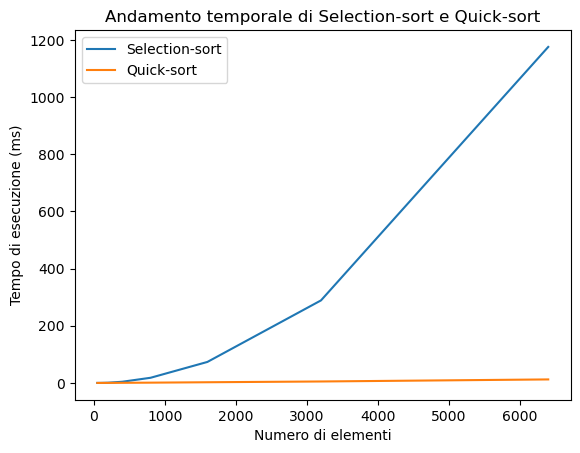

Secondo test con LISTA ORDINATA...
Test con 50 elementi
Test con 100 elementi
Test con 200 elementi
Test con 400 elementi
Test con 800 elementi
Test con 1600 elementi
Test con 3200 elementi
Test con 6400 elementi


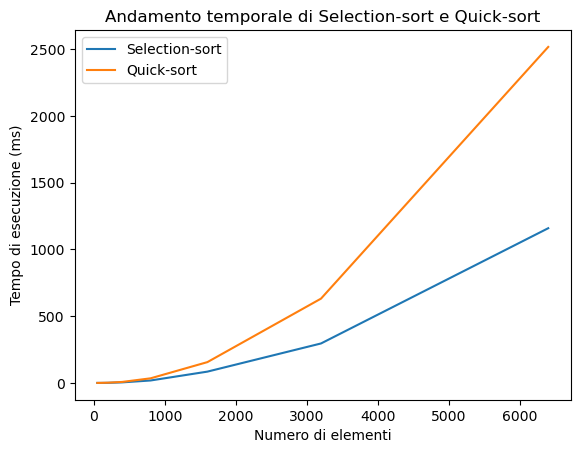

Terzo test con lista INVERSAMENTE ORDINATA...
Test con 50 elementi
Test con 100 elementi
Test con 200 elementi
Test con 400 elementi
Test con 800 elementi
Test con 1600 elementi
Test con 3200 elementi
Test con 6400 elementi


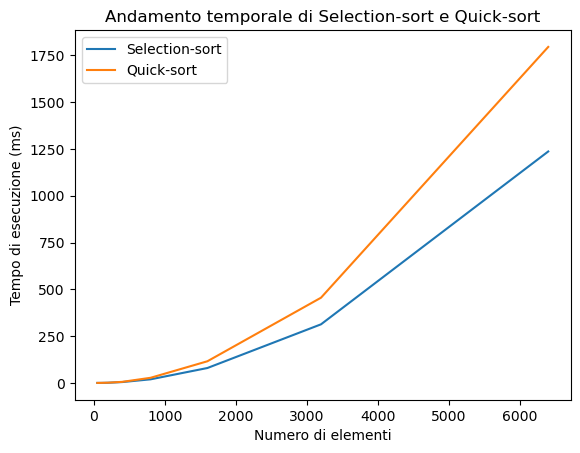

In [73]:
import random
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.setrecursionlimit(10 ** 9)

# --- Funzioni per generare i dati ---
def generate_random_list(n, min_val=0, max_val=10000):
    """Genera una lista casuale di n elementi"""
    return [random.randint(min_val, max_val) for _ in range(n)]

def generate_sorted_list(n):
    """Genera una lista ordinata da 0 a n-1"""
    return list(range(n))

def generate_reverse_list(n):
    """Genera una lista inversamente ordinata da n-1 a 0"""
    return list(range(n - 1, -1, -1))

# --- Funzione di test ---
def test(alg_lista, iterazioni):
    dimensioni_lista = [50, 100, 200, 400, 800, 1600, 3200, 6400]
    selection_sort_t = []
    quick_sort_t = []

    for n in dimensioni_lista:
        print(f"Test con {n} elementi")

        selection_sort_times = []
        quick_sort_times = []

        for _ in range(iterazioni):
            lista = alg_lista(n)

            lista1 = lista.copy()
            lista2 = lista.copy()

            start = timer()
            selection_sort(lista1)
            stop = timer()
            #print("tempo selection sort: ", (stop-start)*1000)
            selection_sort_times.append(stop - start)

            start = timer()
            quick_sort(lista2, 0, len(lista2) - 1)
            stop = timer()
            #print("tempo quick sort: ", (stop-start)*1000)
            quick_sort_times.append(stop - start)


        # Calcola il tempo medio per ogni algoritmo
        selection_sort_t.append(np.mean(selection_sort_times) * 1000)
        quick_sort_t.append(np.mean(quick_sort_times) * 1000)

    plt.plot(dimensioni_lista, selection_sort_t, label='Selection-sort')
    plt.plot(dimensioni_lista, quick_sort_t, label='Quick-sort')
    plt.xlabel('Numero di elementi')
    plt.ylabel('Tempo di esecuzione (ms)')
    plt.title('Andamento temporale di Selection-sort e Quick-sort')
    plt.legend()
    plt.show()

def main():        
    iterazioni = 5  # Numero di iterazioni per ciascun test

    print('Test con LISTA CASUALE...')
    test(generate_random_list, iterazioni)

    print('Secondo test con LISTA ORDINATA...')
    test(generate_sorted_list, iterazioni)

    print('Terzo test con lista INVERSAMENTE ORDINATA...')
    test(generate_reverse_list, iterazioni)

main()

Sono stati eseguiti 3 test:
* lista con elementi generati **randomicamente**
* lista con elementi da 0 a n-1 **in ordine**
* lista con elementi da n-1 a 0 **in ordine inverso**



## Conclusioni e considerazioni finali

Osservando i grafici possiamo notare come nel caso base il _selection-sort_ sia un algoritmo **poco efficente**, infatti in tutti i test si ha sempre una crescita assimilabile alla funzione esponenziale. <br>
Al contrario _quick-sort_ anche a fronte di un gran numero di elementi ha mediamente dei tempi di esecuzione molto __più efficenti__, infatti all'interno del primo grafico ha tempi di esecuzione infinitesivamente più bassi del _quick-sort_, il quale a prescindere dalla tipologia di lista **dovrà sempre scorrere tutta la lista** ad ogni iterazione per trovare il minimo/massimo e ordinarla. .<br>
Negli ultimi due grafici invece il _quick-sort_ mostra che il suo **costo** è **esponenziale** quando la **lista** è **già ordinata**(caso peggiore per questo algoritmo). <br>
Quindi possiamo concludere dicendo che il **quick-sort** è un algoritmo estremamente migliore, a meno che non si cerchi di ordinare una lista già ordinata(raro che si debbano eseguire operazioni del genere) in cui i tempi di esecuzione sono simili.